In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%run rbf.ipynb

In [2]:
n_generated = 100
n_samples = 4*n_generated
radius = 3
x = np.linspace(-np.sqrt(radius),np.sqrt(radius),n_generated)
x = x.reshape(-1,1)
points = np.hstack((x,x))

In [3]:
np.random.seed(167167)
left = np.random.multivariate_normal(mean=np.array((-0.5,-0.5)),cov=np.eye(2)*0.02,size=n_generated)
right = np.random.multivariate_normal(mean=np.array((0.5,0.5)),cov=np.eye(2)*0.02,size=n_generated)

In [4]:
np.random.seed(167167)
points[:,1] = np.sqrt(np.abs(radius - points[:,0]**2))
noise_up = np.random.uniform(-0.1,0.1,n_generated)
noise_down = np.random.uniform(-0.1,0.1,n_generated)

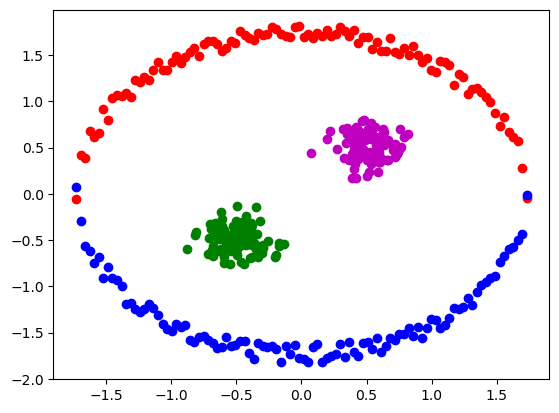

In [5]:
plt.plot(points[:,0],points[:,1]+noise_up,'ro')
plt.plot(points[:,0],-points[:,1]+noise_down,'bo')
plt.plot(left[:,0],left[:,1],'go')
plt.plot(right[:,0],right[:,1],'mo')
#plt.plot(np.linspace(-2,2,10),np.linspace(-2,2,10)*0.75)

In [6]:
up = points[:,1]+noise_up
up = up.reshape(-1,1)
down = -points[:,1]+noise_up
down = down.reshape(-1,1)
data_up = np.hstack((x,up))
data_down = np.hstack((x,down))
whole_data = np.vstack((data_up,data_down,left,right))

In [7]:
sigma = 1/20
W = np.zeros((n_samples,n_samples))
for i in range(n_samples):
    for k in range(i,n_samples):
        W[i,k] = rbf(x=whole_data[i,:],y=whole_data[k,:],l_squared=sigma)
        if W[i,k] <= 0:
            W[i,k] = 0
        W[k,i] = W[i,k]
    W[i,i] = 1
    
diag_mat = np.eye(n_samples)

for i in range(n_samples):
    diag_mat[i,i] = np.sum(W[i,:])

L = diag_mat - W

eigenvalues, eigenvectors = np.linalg.eig(L)

for i in range(eigenvalues.shape[0]):
    if eigenvalues[i]<1e-5:
        eigenvalues[i] = 0

sorted_eigenvalues = np.argsort(eigenvalues)

n_cluster = 3
n_components = 3
U = np.zeros((n_samples,n_components))
for i in range(n_components):
    U[:,i] = eigenvectors[:,sorted_eigenvalues[i]]

cluster_fit = KMeans(n_clusters=n_cluster,random_state=18761867).fit(U)
labels = cluster_fit.predict(U)
df_points = pd.DataFrame(whole_data)
df_points['label'] = labels
df_points.columns = ['x1','x2','label']
colors = {0: 'blue', 1: 'red',2:'green'}
color_list = [colors[group] for group in df_points['label']]

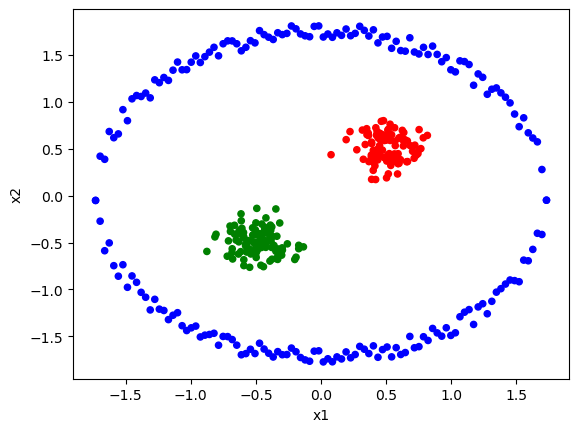

In [8]:
ax = df_points.plot.scatter('x1','x2', c=color_list)

In [9]:
np.sort(eigenvalues)[:3]

array([0.        , 0.00412877, 0.01258024])